In [1]:
# Carga del dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100  # rescalar el target en k$

In [2]:
# Modelo a entrenar
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

regressor = DecisionTreeRegressor()
# regressor = LinearRegression()

In [3]:
# Cálculo de errores de training y test
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(regressor, data, target,
                            cv=cv, scoring="neg_mean_absolute_error",
                            return_train_score=True, n_jobs=2)
cv_results = pd.DataFrame(cv_results)
print(cv_results)

    fit_time  score_time  test_score   train_score
0   0.474673    0.014713  -45.247448 -1.417772e-14
1   0.495853    0.006040  -46.699048 -1.454822e-14
2   0.557837    0.013994  -46.659583 -1.453445e-14
3   0.548124    0.008077  -47.947768 -8.093440e-15
4   0.506713    0.015057  -45.562614 -3.614680e-15
5   0.501131    0.015689  -47.369178 -3.600909e-15
6   0.485840    0.005768  -43.871406 -3.600909e-15
7   0.472631    0.010807  -45.165065 -1.520231e-14
8   0.493791    0.009002  -44.582720 -1.366005e-14
9   0.483416    0.006547  -45.589381 -3.848773e-15
10  0.499176    0.008768  -48.668990 -3.931394e-15
11  0.529359    0.008271  -46.915306 -1.408348e-14
12  0.489220    0.005433  -44.695023 -3.198131e-15
13  0.468798    0.007495  -47.709711 -1.514379e-14
14  0.630383    0.030109  -45.645922 -1.076142e-14
15  0.659137    0.009687  -45.272886 -1.251368e-14
16  0.655490    0.006543  -45.953313 -1.561542e-14
17  0.647781    0.018881  -45.768089 -3.256654e-15
18  0.610584    0.008827  -44.8

## Curva de validación
Algunos hiperparámetros del modelo suelen ser la clave para pasar de underfitting a overfitting.
Podemos trazar una curva llamada curva de validación.

In [4]:
%%time
from sklearn.model_selection import validation_curve

max_depth = [1, 5, 10, 15, 20, 25]
train_scores, test_scores = validation_curve(
    regressor, data, target, param_name="max_depth", param_range=max_depth,
    cv=cv, scoring="neg_mean_absolute_error", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

CPU times: total: 875 ms
Wall time: 36.9 s


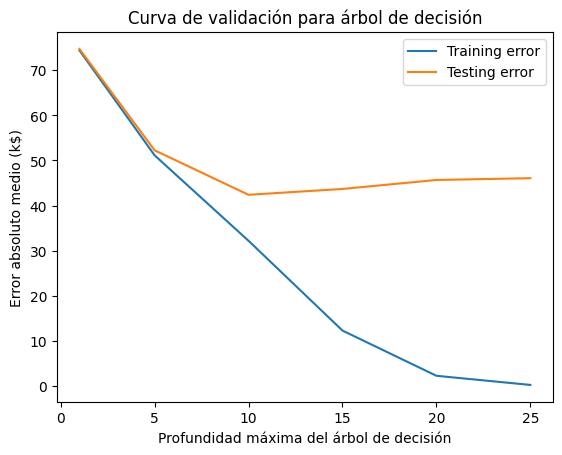

In [5]:
import matplotlib.pyplot as plt

plt.plot(max_depth, train_errors.mean(axis=1), label="Training error")
plt.plot(max_depth, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Profundidad máxima del árbol de decisión")
plt.ylabel("Error absoluto medio (k$)")
_ = plt.title("Curva de validación para árbol de decisión")

#### Con la desviación estándar añadida

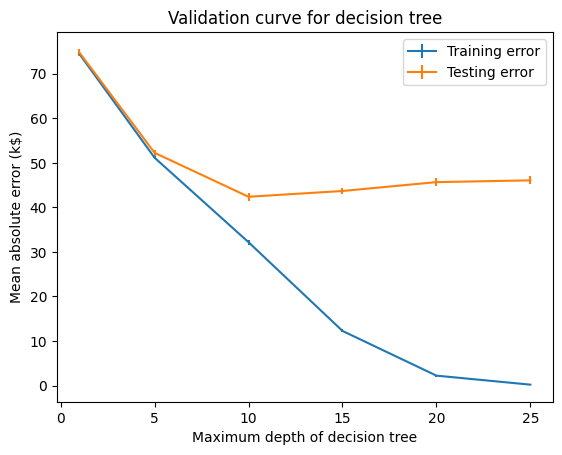

In [6]:
plt.errorbar(max_depth, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label='Training error')
plt.errorbar(max_depth, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label='Testing error')
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")